In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [32]:
df = pd.read_csv("/Users/krushna/Documents/CSV Files/Missing Data/Imputation/titanic_toy.csv")

In [33]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [34]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

We see both of them are greater than 5%, therefore we choose Mean/Median Imputation

In [35]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [37]:
print("X_Train Shape" , x_train.shape)
print("X_Test Shape" , x_test.shape)

X_Train Shape (712, 3)
X_Test Shape (179, 3)


In [38]:
x_train.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [39]:
# We apply Mean/Median Imputation
mean_impute_for_age = x_train['Age'].mean()
median_impute_for_age = x_train['Fare'].median()

mean_impute_for_fare = x_train['Age'].mean()
median_impute_for_fare = x_train['Fare'].median()

print("mean_impute_for_age = ", mean_impute_for_age)
print("median_impute_for_age = ", median_impute_for_age)
print("mean_impute_for_fare = ", mean_impute_for_fare)
print("median_impute_for_fare = ", median_impute_for_fare)

mean_impute_for_age =  29.498846153846156
median_impute_for_age =  14.4
mean_impute_for_fare =  29.498846153846156
median_impute_for_fare =  14.4


In [40]:
#Create new Column and add those imputed values 
x_train['Age_median'] = x_train['Age'].fillna(median_impute_for_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_impute_for_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_impute_for_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_impute_for_fare)

In [41]:
x_train.head()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


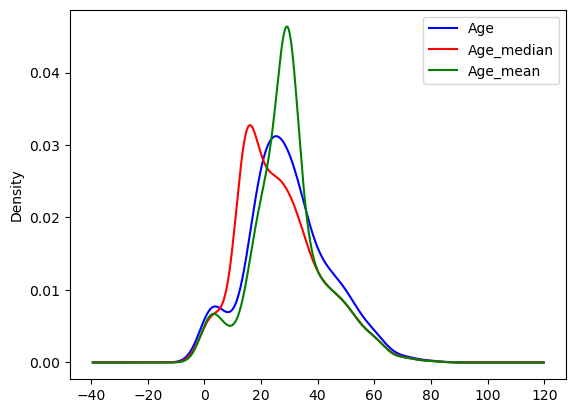

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax, color='blue')

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### This means for column Age, Median works better than mean.

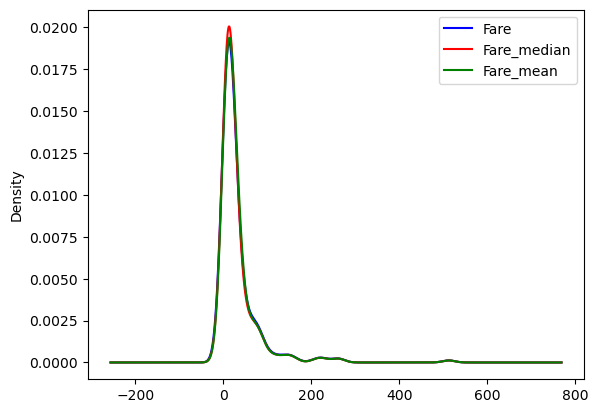

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax, color='blue')

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### This means both work equally, but we see re mark at point, concludes Mean computes better

In [45]:
x_train.cov()


,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.008529
Fare,75.481375,2761.031435,18.599163,97.632173,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.328300,-5.616299,17.672035,17.659866
Age_median,210.251707,97.632173,-5.328300,204.914945,168.851934,90.996224,92.406745
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.026540
Fare_median,70.082085,2761.031435,17.672035,90.996224,56.282518,2637.012482,2623.861792
Fare_mean,71.008529,2761.031435,17.659866,92.406745,57.026540,2623.861792,2621.670511


In [46]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088692
Fare,0.091482,1.000000,0.207193,0.129700,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.221228,-0.256883,0.204536,0.204992
Age_median,1.000000,0.129700,-0.221228,1.000000,0.907750,0.123789,0.126075
Age_mean,1.000000,0.088151,-0.256883,0.907750,1.000000,0.084346,0.085711
Fare_median,0.087232,1.000000,0.204536,0.123789,0.084346,1.000000,0.997920
Fare_mean,0.088692,1.000000,0.204992,0.126075,0.085711,0.997920,1.000000


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [58]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [59]:
trtf = ColumnTransformer([
        ('imputer1', imputer1, ['Age']),
        ('imputer2', imputer1, ['Fare'])
], remainder = 'passthrough')

In [60]:
trtf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [61]:
trtf.named_transformers_['imputer1'].statistics_

array([28.])

In [62]:
trtf.named_transformers_['imputer2'].statistics_

array([14.4])

In [63]:
X_train = trtf.transform(X_train)
X_test = trtf.transform(X_test)

In [64]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

In [65]:
# Arbitrary Imputation

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [68]:
#Create new Column and add those imputed values with Arbitrary
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minusone'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(99)
x_train['Fare_minusone'] = x_train['Fare'].fillna(-1)

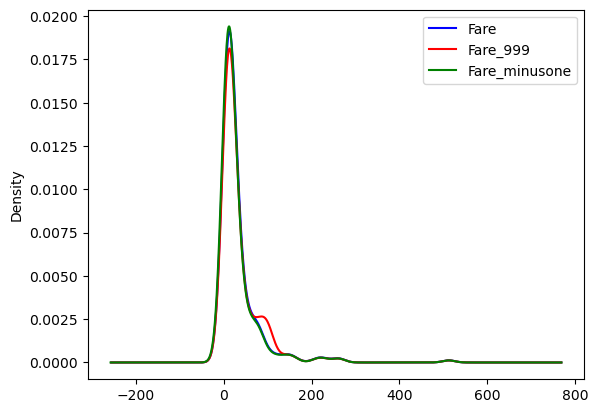

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax, color='blue')

# variable imputed with the median
x_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_minusone'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### The best fit goes with Fare-999

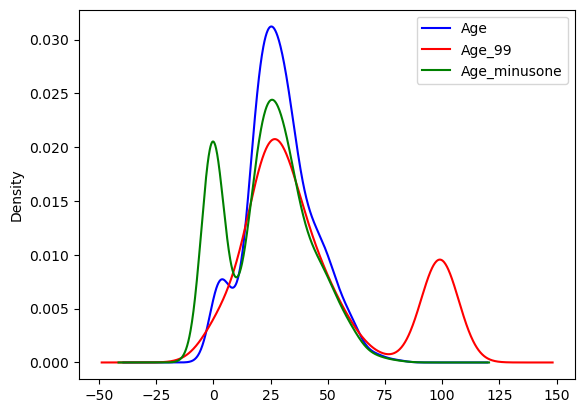

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax, color='blue')

# variable imputed with the median
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_minusone'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### The method is least working with age beacuse age cannot be 99 in more often and cannot be -1